## To-Do:
- wordclouds?
- acknowledgements

## 1. Introduction
A notebook for NLP on the Wikipedia Movie Plots dataset using spaCy. We illustrate the following:
- Exploratory data analysis (EDA) and wordclouds
- NLP with spacy: tokenization, lemmatization, parts-of-speech (PoS) tagging, Dependency Parsing, Named Entity Recognition (NER), Sentence Boundary Detection (SBD)
- ? Vectorization with Bag of Words (BoW), TF-IDF and spaCy using scikit-learn
- Topic modelling: Extract major themes (topics) from plots using Latent Dirichlet Allocation (LDA) and Latent Semantic Indexing Model (LSI) using Truncated Singular Value Decomposition (SVD) using scikit-learn
- Visualization

In [1]:
# Core
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ML & NLP
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.manifold import TSNE
# import concurrent.futures
# import time
import pyLDAvis.sklearn
import spacy
from spacy import displacy

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:585: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:627: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:637: D

In [2]:
# Download spaCy library
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 11.2 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow

## 2. EDA

### 2.1 Load movie plots dataset 

In [12]:
# Loading data
df_plots = pd.read_csv('./wiki_movie_plots.csv')
df_plots.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### 2.2 Summary stats

In [13]:
df_plots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [14]:
df_plots.shape

(34886, 8)

In [15]:
# Find number of movies with plots available
df_plots.Plot.notnull().sum()

34886

<AxesSubplot:title={'center':'Top genres'}, xlabel='Genre'>

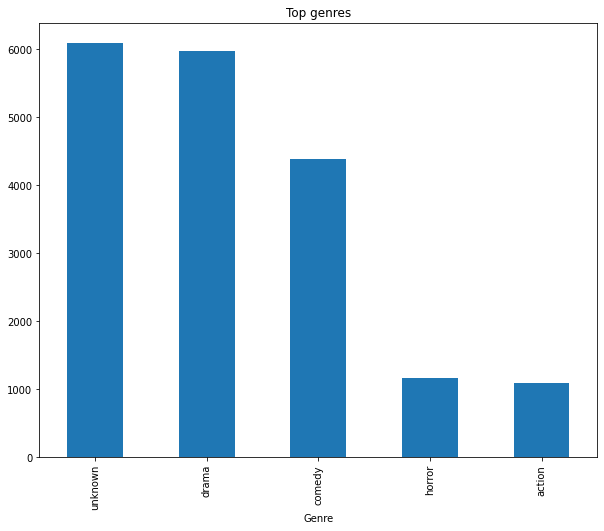

In [26]:
# Show popular genres
top_genres = df_plots.Genre.value_counts()[:5]
top_genres.plot(kind='bar', figsize=(10, 8), xlabel='Genre', title='Top genres')

### 2.3 Wordcloud

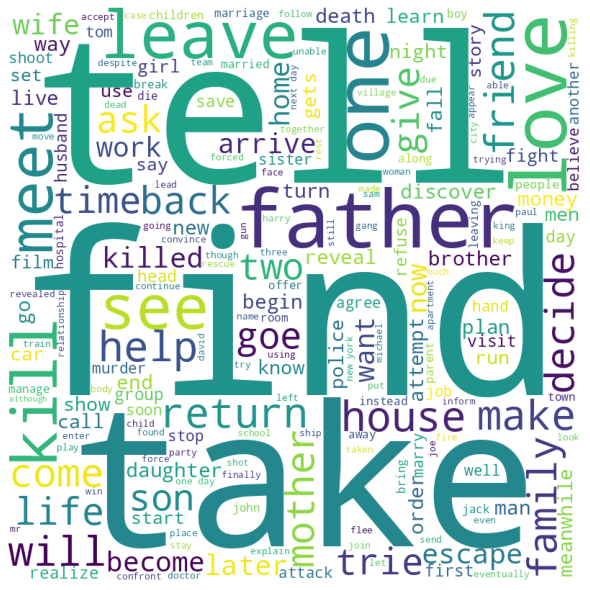

In [22]:
# Generate wordcloud from plots
from wordcloud import WordCloud, STOPWORDS
 
plot_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_plots.Plot:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    plot_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(plot_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
 
plt.show()

## 3. Features

In [23]:
# Create a spaCy object
nlp = spacy.load('en_core_web_lg')

In [27]:
# Get sample movie plot
sample_plot = df_plots['Plot'][10000]
sample_plot

"After a series of murders in Los Angeles's gay community, heterosexual police officer Sgt. Benson is assigned to go undercover as half of a gay couple with Officer Kerwin, a Records Clerk. Kerwin naively believes that he is closeted, although the entire Department knows about his sexual identity. The pair discover an earlier murder and learn that both victims appeared in the same gay magazine. Each had received a call from a hoarse-voiced man asking them to model for him, only to turn up dead soon after. Benson models for the magazine and is approached by the same hoarse-voiced man; but, when another model turns up dead, the man is cleared as a suspect.\r\nBenson grows close to Jill, the photographer of his shoot, and plans a weekend getaway with her. Kerwin suspects her of the murders, but his superiors put it down to jealousy. Kerwin uncovers evidence implicating Jill; but, when the police move to apprehend her, they discover her corpse. Her death unknown to Benson, he arrives for h

In [53]:
# Create doc from sample
doc = nlp(sample_plot)

### 3.1 Tokenization <a id="21"></a> <br>

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords.

In [29]:
for token in doc:
    print(token.text)

After
a
series
of
murders
in
Los
Angeles
's
gay
community
,
heterosexual
police
officer
Sgt
.
Benson
is
assigned
to
go
undercover
as
half
of
a
gay
couple
with
Officer
Kerwin
,
a
Records
Clerk
.
Kerwin
naively
believes
that
he
is
closeted
,
although
the
entire
Department
knows
about
his
sexual
identity
.
The
pair
discover
an
earlier
murder
and
learn
that
both
victims
appeared
in
the
same
gay
magazine
.
Each
had
received
a
call
from
a
hoarse
-
voiced
man
asking
them
to
model
for
him
,
only
to
turn
up
dead
soon
after
.
Benson
models
for
the
magazine
and
is
approached
by
the
same
hoarse
-
voiced
man
;
but
,
when
another
model
turns
up
dead
,
the
man
is
cleared
as
a
suspect
.


Benson
grows
close
to
Jill
,
the
photographer
of
his
shoot
,
and
plans
a
weekend
getaway
with
her
.
Kerwin
suspects
her
of
the
murders
,
but
his
superiors
put
it
down
to
jealousy
.
Kerwin
uncovers
evidence
implicating
Jill
;
but
,
when
the
police
move
to
apprehend
her
,
they
discover
her
corpse
.
Her
death
unknown
to

### 3.2 Part-Of-Speech (POS) Tagging <a id="22"></a> <br>

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech,[1] based on both its definition and its context.

In [30]:
for token in doc:
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

After IN ADP conjunction, subordinating or preposition
a DT DET determiner
series NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
murders NNS NOUN noun, plural
in IN ADP conjunction, subordinating or preposition
Los NNP PROPN noun, proper singular
Angeles NNP PROPN noun, proper singular
's POS PART possessive ending
gay JJ ADJ adjective (English), other noun-modifier (Chinese)
community NN NOUN noun, singular or mass
, , PUNCT punctuation mark, comma
heterosexual JJ ADJ adjective (English), other noun-modifier (Chinese)
police NN NOUN noun, singular or mass
officer NN NOUN noun, singular or mass
Sgt NNP PROPN noun, proper singular
. . PUNCT punctuation mark, sentence closer
Benson NNP PROPN noun, proper singular
is VBZ AUX verb, 3rd person singular present
assigned VBN VERB verb, past participle
to TO PART infinitival "to"
go VB VERB verb, base form
undercover JJ ADJ adjective (English), other noun-modifier (Chinese)
as IN ADP conjunction, subordinati

### 3.3 Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 

In [31]:
for token in doc:
    print(token.text, "-->", token.lemma_)

After --> after
a --> a
series --> series
of --> of
murders --> murder
in --> in
Los --> Los
Angeles --> Angeles
's --> 's
gay --> gay
community --> community
, --> ,
heterosexual --> heterosexual
police --> police
officer --> officer
Sgt --> Sgt
. --> .
Benson --> Benson
is --> be
assigned --> assign
to --> to
go --> go
undercover --> undercover
as --> as
half --> half
of --> of
a --> a
gay --> gay
couple --> couple
with --> with
Officer --> Officer
Kerwin --> Kerwin
, --> ,
a --> a
Records --> Records
Clerk --> Clerk
. --> .
Kerwin --> Kerwin
naively --> naively
believes --> believe
that --> that
he --> he
is --> be
closeted --> closeted
, --> ,
although --> although
the --> the
entire --> entire
Department --> Department
knows --> know
about --> about
his --> his
sexual --> sexual
identity --> identity
. --> .
The --> the
pair --> pair
discover --> discover
an --> an
earlier --> early
murder --> murder
and --> and
learn --> learn
that --> that
both --> both
victims --> victim
appear

### 3.4 Sentence Boundary Detection (SBD)

Sentence Boundary Detection is the process of locating the start and end of sentences in a given text. This allows us to split a large corpus into mutiple sentences.


In [37]:
sentences = list(doc.sents)
len(sentences)

In [38]:
for sentence in sentences:
     print (sentence)

After a series of murders in Los Angeles's gay community, heterosexual police officer Sgt.
Benson is assigned to go undercover as half of a gay couple with Officer Kerwin, a Records Clerk.
Kerwin naively believes that he is closeted, although the entire Department knows about his sexual identity.
The pair discover an earlier murder and learn that both victims appeared in the same gay magazine.
Each had received a call from a hoarse-voiced man asking them to model for him, only to turn up dead soon after.
Benson models for the magazine and is approached by the same hoarse-voiced man; but, when another model turns up dead, the man is cleared as a suspect.

Benson grows close to Jill, the photographer of his shoot, and plans a weekend getaway with her.
Kerwin suspects her of the murders, but his superiors put it down to jealousy.
Kerwin uncovers evidence implicating Jill; but, when the police move to apprehend her, they discover her corpse.
Her death unknown to Benson, he arrives for his 

### 3.5 Dependency Parsing

Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.

for token in sentences[-1]:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.dep_)

In [48]:
displacy.render(sentences[-1], style="dep" , jupyter=True, options={'distance': 75})

spaCy also comes with a built-in named entity visualizer that lets you check your model's predictions in your browser. You can pass in one or more <code>Doc</code> objects and start a web server, export HTML files or view the visualization directly from a Jupyter Notebook.

### 3.6 Named Entity Recognition
 Named Entity Recognition is an information extraction task where named entities in unstructured sentences are located and classified  in some pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

entities=[(i, i.label_, i.label) for i in doc.ents]
entities

In [45]:
spacy.displacy.render(doc, style='ent',jupyter=True)

Create custom tokenizer

tqdm.pandas()
plots_tokenized = df_plots.Plot[-100:].progress_apply(tokenize)
plots_tokenized

### 3.7 Bag of Words (BoW)

BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.
N-grams are combinations of adjacent words in a given text, where n is the number of words that incuded in the tokens. 

In [50]:
# Create custom tokenizer from spacy doc by lemmatizing, converting to lowercase, and removing whitespace. 
# Stopwords, punctuation & numbers are excluded
def spacy_tokenizer(text):
    return ' '.join([word.lemma_.lower().strip() for word in nlp(text) if word.text != '\n' and not word.is_stop and not word.is_punct and not word.like_num])

In [89]:
doc = df_plots.Plot[-10000:].apply(spacy_tokenizer)
doc

24886    heera dev anand passion life photography love ...
24887    close friend neelu madhu agree man trust decid...
24888    look alike twin separate birth grow farmer tou...
24889    jailor manmohan krishan responsible look convi...
24890    widow wealthy durgadas prasad nazir hussain so...
                               ...                        
34881    film begin world war end centre joshua connor ...
34882      musician salih gürkan describe adventure cousin
34883    zafer sailor live mother döndü coastal village...
34884    film centre young woman name amy tyler book su...
34885    writer orhan şahin return i̇stanbul year help ...
Name: Plot, Length: 10000, dtype: object

In [66]:
bow_vector = CountVectorizer(ngram_range=(1, 1))
bow_vector.fit_transform(doc)

<1000x14826 sparse matrix of type '<class 'numpy.int64'>'
	with 94754 stored elements in Compressed Sparse Row format>

### 3.8 TF-IDF

In information retrieval, tf–idf (also TFIDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [68]:
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vector.fit_transform(doc)

<1000x14826 sparse matrix of type '<class 'numpy.float64'>'
	with 94754 stored elements in Compressed Sparse Row format>

## 4. Topic-modelling

In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body.

tqdm.pandas()
plots_tokenized = df_plots.Plot[-100:].progress_apply(tokenize)
plots_tokenized

In [90]:
# Creating a vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.9, ngram_range=(1, 1))
plots_vector = vectorizer.fit_transform(doc)

In [71]:
n_topics = 10    # no. of topics to extract

### 4.1 Latent Dirichlet Allocation Model

In [91]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100, learning_method='online',verbose=False)
data_lda = lda.fit_transform(plots_vector)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

In [77]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [88]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
['chul', 'ja', 'idol', 'mak', 'mi', 'ae', 'cicakman', 'hyuk', 'dream', 'divine']
Topic 1:
['life', 'young', 'family', 'year', 'father', 'film', 'old', 'love', 'village', 'live']
Topic 2:
['kill', 'find', 'man', 'take', 'fight', 'tell', 'leave', 'death', 'police', 'escape']
Topic 3:
['jun', 'dragon', 'vampire', 'mary', 'aema', 'human', 'momo', 'kiss', 'shot', 'magic']
Topic 4:
['friend', 'girl', 'day', 'tell', 'time', 'meet', 'see', 'leave', 'school', 'find']
Topic 5:
['soo', 'hee', 'jung', 'jin', 'yeon', 'young', 'eun', 'min', 'ji', 'woo']
Topic 6:
['korean', 'japanese', 'north', 'south', 'korea', 'kim', 'young', 'hee', 'wook', 'jong']
Topic 7:
['kolya', 'world', 'dima', 'game', 'rin', 'emu', 'vera', 'power', 'stand', 'destroy']
Topic 8:
['rei', 'school', 'tae', 'goo', 'mi', 'ji', 'team', 'hina', 'player', 'byeong']
Topic 9:
['king', 'prince', 'queen', 'palace', 'son', 'princess', 'royal', 'joseon', 'kingdom', 'dobrynya']


In [82]:
# Visualize LDA topics
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      32.420952   8.115230       1        1  37.646973
1       0.648955  71.707100       2        1  18.958062
4      71.019684   9.971006       3        1  14.983301
5       3.785981  33.185135       4        1  12.851285
6     -42.666500  -9.222070       5        1   4.786449
8      -3.621689 -43.526516       6        1   4.572179
9      -3.632402  -4.171708       7        1   1.903714
3     -36.584400  35.804413       8        1   1.705670
7      44.391380  50.615383       9        1   1.415754
0      40.235809 -31.591665      10        1   1.176614, topic_info=        Term        Freq       Total Category  logprob  loglift
4167     soo  437.000000  437.000000  Default  30.0000  30.0000
2040     hee  406.000000  406.000000  Default  29.0000  29.0000
4164     son  304.000000  304.000000  Default  28.0000  28.0000
2491    king  160.000000  160.000000  Default  27.0000  27.0000
2813      mi  257.000000  257.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
4445    team    8.051429  165.143719  Topic10  -5.1964   1.4216
2136   house    8.422591  227.755427  Topic10  -5.1513   1.1452
2990     new    8.624857  323.042760  Topic10  -5.1276   0.8194
1625  family    7.631418  413.243915  Topic10  -5.2500   0.4508
1869    girl    6.873834  329.415304  Topic10  -5.3545   0.5729

[631 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
74        2  0.771514         adam
74        3  0.023379         adam
74       10  0.187034         adam
105       2  0.939643  advertising
109       4  0.105285           ae
...     ...       ...          ...
4983      2  0.925893       zeynep
4984      1  0.078117       zombie
4984      4  0.468700       zombie
4984      8  0.390583       zombie
4984      9  0.039058       zombie

[1371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 6, 7, 9, 10, 4, 8, 1])

## How to interpret this graph?
1. Topics on the left while their respective keywords are on the right.
2. Larger topics are more frequent and closer the topics, mor the similarity
3. Selection of keywords is based on their frequency and discriminancy.

**Hover over the topics on the left to get information about their keywords on the right.**

### 4.2 Latent Semantic Indexing (LSI) Model using Truncated SVD

In [80]:
lsi = TruncatedSVD(n_components=n_topics)
data_lsi = lsi.fit_transform(plots_vector)

In [81]:
# Keywords for topics clustered by Latent Semantic Indexing
print("LSI Model:")
selected_topics(lsi, vectorizer)

LSI Model:
Topic 0:
['ji', 'mi', 'find', 'tell', 'kill', 'leave', 'take', 'friend', 'go', 'man']
Topic 1:
['mi', 'ji', 'goo', 'hae', 'byung', 'camp', 'people', 'soldier', 'ki', 'infect']
Topic 2:
['eun', 'han', 'sun', 'da', 'ji', 'soo', 'hee', 'jae', 'daughter', 'yeon']
Topic 3:
['han', 'sasha', 'da', 'sun', 'ji', 'olga', 'see', 'come', 'hospital', 'moscow']
Topic 4:
['rei', 'hina', 'school', 'sister', 'shimada', 'match', 'game', 'family', 'king', 'face']
Topic 5:
['sasha', 'soo', 'rei', 'olga', 'byeong', 'eun', 'joo', 'hee', 'yeon', 'tae']
Topic 6:
['yeon', 'hwa', 'hee', 'mother', 'mi', 'jin', 'sasha', 'yoo', 'hwi', 'kwon']
Topic 7:
['young', 'jong', 'won', 'korean', 'sasha', 'hyun', 'north', 'south', 'mu', 'rei']
Topic 8:
['yeon', 'kill', 'king', 'kwon', 'son', 'sook', 'soo', 'reveal', 'death', 'anton']
Topic 9:
['idol', 'hee', 'dream', 'divine', 'team', 'reveal', 'grand', 'win', 'jong', 'eun']


#### Visualizing LSI(SVD) scatterplot
We will be visualizing our data for 2  topics to see similarity between keywords which is measured by distance with the markers using LSI model

In [83]:
data_lsi_2d = TruncatedSVD(n_components=2).fit_transform(plots_vector)

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


trace = go.Scattergl(
    x = data_2d[:,0],
    y = data_2d[:,1],
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    ),
    text = vectorizer.get_feature_names(),
    hovertext = vectorizer.get_feature_names(),
    hoverinfo = 'text' 
)
data = [trace]
iplot(data, filename='scatter-mode')

## The text version of scatter plot looks messy but you can zoom it for great results

trace = go.Scattergl(
    x = data_2d[:,0],
    y = data_2d[:,1],
    mode = 'text',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    ),
    text = vectorizer.get_feature_names()
)
data = [trace]
iplot(data, filename='text-scatter-mode')

Let's see what happens when we use a spaCy based bigram tokenizer for topic modelling

def spacy_bigram_tokenizer(phrase):
    doc = parser(phrase) # create spacy object
    token_not_noun = []
    notnoun_noun_list = []
    noun = ""

    for item in doc:
        if item.pos_ != "NOUN": # separate nouns and not nouns
            token_not_noun.append(item.text)
        if item.pos_ == "NOUN":
            noun = item.text
        
        for notnoun in token_not_noun:
            notnoun_noun_list.append(notnoun + " " + noun)

    return " ".join([i for i in notnoun_noun_list])

bivectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, ngram_range=(1,2))
bigram_vectorized = bivectorizer.fit_transform(wines["processed_description"])

## LDA for bigram data

bi_lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_bi_lda = bi_lda.fit_transform(bigram_vectorized)

### Topics for bigram model

print("Bi-LDA Model:")
selected_topics(bi_lda, bivectorizer)

bi_dash = pyLDAvis.sklearn.prepare(bi_lda, bigram_vectorized, bivectorizer, mds='tsne')
bi_dash

**Very few keywords with 2 words have been found like "spin dry" , "black cherry", etc.**

Kindly upvote and comment if you like this.